# Generalized Linear Models

### Linear Regression

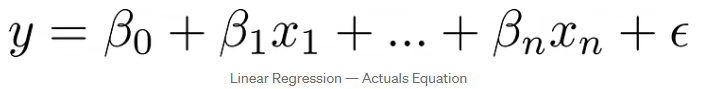

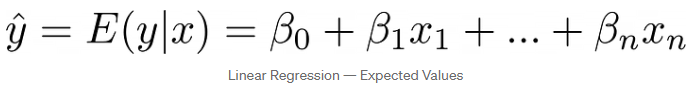

* The value $\hat{y}$ you get from the model is the mean (expected value) of y given x i.e. E(y|x)
  * For massive datasets, for each value of x, there will be multiple values of y
  * The model will predict the expected value of y for each one of these x values
  * The model expects the remaining y's to be normally distributed

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression, PoissonRegressor
import matplotlib.pyplot as plt

### Create dataset

* For each value of x, we have multiple y values

In [2]:
x = [[1], [1], [2], [2]]
y = [9, 11, 19, 21]

# Set range for plotting
x_range = np.arange(start=0, stop=4)   # 0 to 3

### Fit a Linear Regression model

* Linear Regression model is fitted by minimizing the MSE (Mean Squared Error), resulting $\hat{y}$ are the means
* If a model is fitted by minimizing the MAE (Mean Absolute Error), resulting $\hat{y}$ are the medians

In [3]:
linear = LinearRegression()
linear.fit(x, y)
linear_coef = linear.coef_ * x_range + linear.intercept_

print(f"Predicted y given that x=1: {linear.predict([[1]])} which is the mean of 9 and 11")
print(f"Predicted y given that x=2: {linear.predict([[2]])} which is the mean of 19 and 21")


Predicted y given that x=1: [10.] which is the mean of 9 and 11
Predicted y given that x=2: [20.] which is the mean of 19 and 21


### Line of best fit

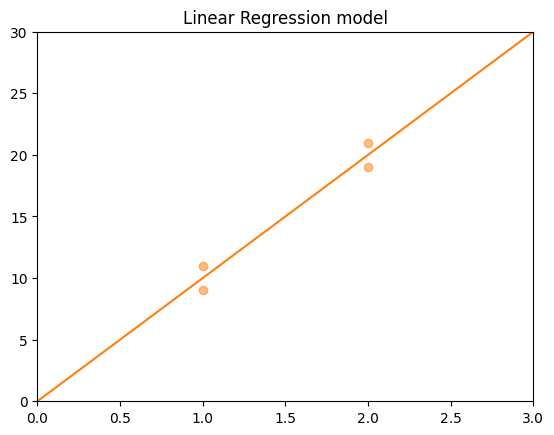

In [4]:
# Datapoints
plt.xlim([0, 3])
plt.ylim([0, 30])
plt.scatter(x, y, alpha=0.5, c='tab:orange')

# Line of best fit
plt.plot(x_range, linear_coef, color='tab:orange')
plt.title("Linear Regression model")
plt.show()

### GLM - Link functions

In Linear Regression, we have the expected values E(y|x) related to a linear structure of data points. If we were to plot the points we can easily draw a line through them.

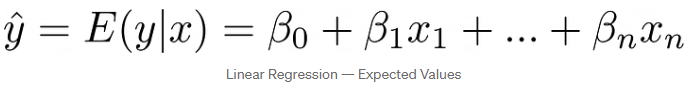

What if our data points do not form a linear relationship?
* We apply a function to our expected values (means) to transform them to be linear
* This is known as a link function
  * Monotonic
  * Invertible
  * Differentiable
* Link functions make sure the the expected values make sense

### GLM - Logisitic Regression

* The link function is the logit of our expected values

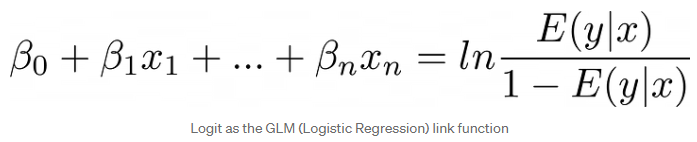

* Rearranging the above equation, the expected values is the sigmoid function

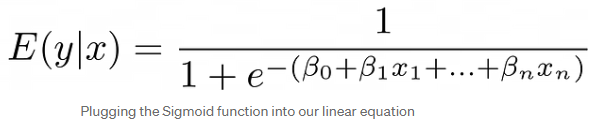

### GLM Poisson Regression

* Good for predicting counts
  * How many rain droplets a square foot gets in a year?
  * How many clicks a link gets in a day?
  * How many bids an item gets in an auction?
* These are all counts of events happening within a specific range / time / area / etc
* We are predicting all non-negative numbers
* The expected values is the exponential function

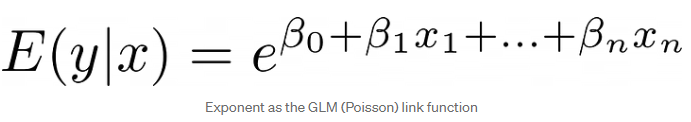

The Poisson distribution:
* Is skewed
* Variance = mean
* Variance grows linearly with E(y|x)

### Create dataset

* A synthetic dataset
* Target y:
  * Grows exponentially with x
  * Has non-constant variance
  * Is non-negative

In [5]:
exp = lambda x: np.exp(x)[0]

x = np.array([[i] for i in np.random.choice(range(1,10), 100)])
y = np.array([exp(i) + np.random.normal(0,0.1*exp(i),1)[0] for i in x])
y[y<0] = 0

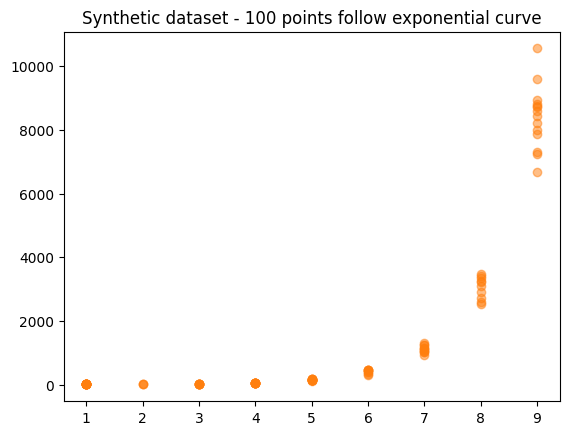

In [11]:
# Plot dataset
plt.scatter(x, y, alpha=0.5, c='tab:orange')
plt.title("Synthetic dataset - 100 points follow exponential curve")
plt.show()

### Fit models

* Linear Regression
* Poisson Regression

In [14]:
# Fit models
linear = LinearRegression().fit(x, y)
poisson = PoissonRegressor(alpha=0, fit_intercept=False).fit(x, y)

# Predicted y values
y_pred_linear = linear.predict(x)
y_pred_poisson = poisson.predict(x)

### Line of best fit

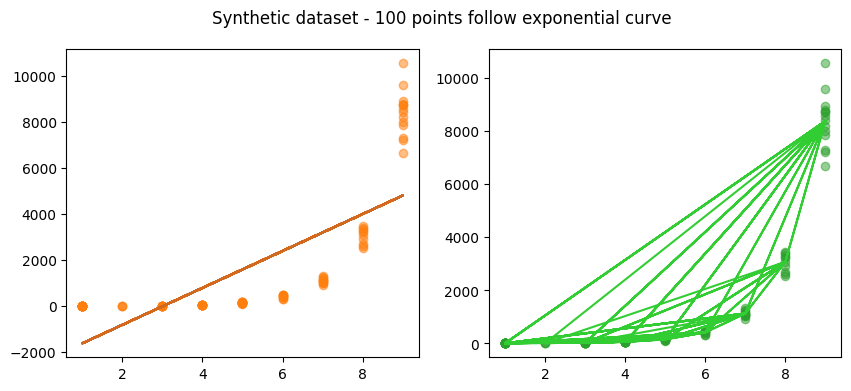

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Synthetic dataset - 100 points follow exponential curve")

# Datapoints
ax1.scatter(x, y, alpha=0.5, c='tab:orange')
ax2.scatter(x, y, alpha=0.5, c='tab:green')

# Best fit line
#ax1.scatter(x, y_pred_linear, alpha=0.5, c='chocolate', marker='*')
#ax2.scatter(x, y_pred_poisson, alpha=0.5, c='limegreen', marker='*')

ax1.plot(x, y_pred_linear, color='chocolate')
ax2.plot(x, y_pred_poisson, color='limegreen')

plt.show()

In [70]:
np.concatenate((x.flatten(), y_pred_linear), axis=0)


array([ 9.00000000e+00,  1.00000000e+00,  4.00000000e+00,  6.00000000e+00,
        9.00000000e+00,  8.00000000e+00,  5.00000000e+00,  9.00000000e+00,
        1.00000000e+00,  7.00000000e+00,  4.00000000e+00,  3.00000000e+00,
        9.00000000e+00,  4.00000000e+00,  2.00000000e+00,  9.00000000e+00,
        1.00000000e+00,  7.00000000e+00,  1.00000000e+00,  7.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  4.00000000e+00,  6.00000000e+00,
        2.00000000e+00,  8.00000000e+00,  3.00000000e+00,  9.00000000e+00,
        5.00000000e+00,  6.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        4.00000000e+00,  5.00000000e+00,  6.00000000e+00,  3.00000000e+00,
        5.00000000e+00,  7.00000000e+00,  5.00000000e+00,  5.00000000e+00,
        3.00000000e+00,  9.00000000e+00,  6.00000000e+00,  7.00000000e+00,
        4.00000000e+00,  3.00000000e+00,  7.00000000e+00,  7.00000000e+00,
        5.00000000e+00,  8.00000000e+00,  7.00000000e+00,  9.00000000e+00,
        7.00000000e+00,  

In [78]:
x.flatten()[0]

9

In [77]:
y_pred_linear[0]

4804.764477440815